In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline

In [2]:
#f = xr.open_dataset('atn_deployment.nc')
#f = xr.open_dataset('dt_CREMP_Rev_OBIS_Occurrence_v2_3_1_2007_943b_fba4_b799.nc')
f = xr.open_dataset('../data/atn_NCEI_test_deployment.nc')

In [3]:
f

<xarray.Dataset>
Dimensions:               (obs: 5217)
Coordinates:
    lat                   (obs) float64 ...
    lon                   (obs) float64 ...
    time                  (obs) datetime64[ns] ...
    z                     (obs) float64 ...
Dimensions without coordinates: obs
Data variables: (12/16)
    crs                   int32 ...
    ellipse_orientation   (obs) float64 ...
    error_radius          (obs) float64 ...
    instrument_location   object ...
    instrument_pressure   object ...
    instrument_tag        object ...
    ...                    ...
    qartod_location_flag  object ...
    qartod_rollup_flag2   object ...
    qartod_speed_flag     object ...
    qartod_time_flag      object ...
    semi_major_axis       (obs) float64 ...
    semi_minor_axis       (obs) float64 ...
Attributes: (12/71)
    date_created:                    2020-04-27T16:04:41Z
    featureType:                     trajectory
    cdm_data_type:                   Trajectory
    geospatial_bounds_vertical_crs:  EPSG:4326
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    comment:                         Flat Island, Alaska. Adult female with n...
    sea_name:                        North Pacific Ocean, Sea Okhotsk, and Be...
    summary:                         Wildlife Computers Splash 10 tag deploye...
    title:                           Steller sea lion (Eumetopias jubatus) ta...
    history:                         Mon Feb  8 14:31:10 2021: ncatted -a pla...
    NCO:                             4.7.2

In [4]:
print('\033[4m'+'Global Attributes:'+'\033[0m')
for key in f.attrs:
    print("%s = %s" % (key, f.attrs[key]))
print('\033[4m'+'\nVariable Attributes:'+'\033[0m')
for var in f.variables:
    print('\033[1m'+var+'\033[0m')
    for key in f.variables[var].attrs:
        print('\t%s = %s' % (key,f.variables[var].attrs[key]))
    #f.variables['time'].attrs

Global Attributes:
date_created = 2020-04-27T16:04:41Z
featureType = trajectory
cdm_data_type = Trajectory
geospatial_bounds_vertical_crs = EPSG:4326
geospatial_lat_units = degrees_north
geospatial_lon_units = degrees_east
geospatial_vertical_positive = down
naming_authority = gov.noaa.ioos.atn
publisher_email = atndata@ioos.us
publisher_name = IOOS ATN
publisher_url = https://atn.ioos.us
source = Service Argos
standard_name_vocabulary = CF-v58
geospatial_bbox = POLYGON ((250.83 50.6209, 250.83 66.83069999999999, 159.0115000000001 66.83069999999999, 159.0115000000001 50.6209, 250.83 50.6209))
geospatial_bounds = POLYGON ((159.0115000000001 50.6209, 209.0858 59.7264, 250.83 66.83069999999999, 208.0173 58.7985, 160.9647 50.8049, 159.0115000000001 50.6209))
geospatial_bounds_crs = EPSG:4326
geospatial_vertical_units = m
time_coverage_start = 2019-11-29T15:05:02Z
time_coverage_end = 2020-04-27T08:29:22Z
time_coverage_duration = P149DT17H24M20S
time_coverage_resolution = P0DT0H42M21S
date_i

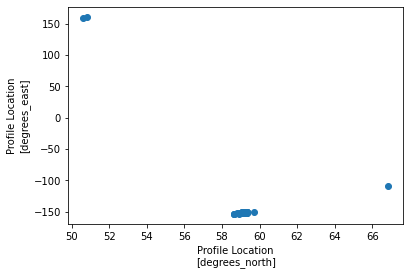

In [5]:
f.plot.scatter('lat','lon')

In [6]:
import folium
from folium.plugins import Fullscreen

map = folium.Map(location=[f.lat.mean(), f.lon.mean()], zoom_start=1)
Fullscreen().add_to(map)

for i in range(0,len(f.lat.data)):
    folium.Circle(
        location=[f.lat.data[i],f.lon.data[i]],
        radius = 5,
        popup = f.platform.species,
    ).add_to(map)
map

In [ ]:
from folium.plugins import HeatMapWithTime
from folium.plugins import Fullscreen

map1 = folium.Map(location=[f.lat.mean(), f.lon.mean()], zoom_start=1)
Fullscreen().add_to(map1)

HeatMapWithTime([f.lat.data,f.lon.data],radius=5,auto_play=True,position='bottomright').add_to(map1)

map1

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

f.plot.scatter(x='lon',y='lat')

## Attempt to animate tracks
uses code from https://nbviewer.jupyter.org/github/ocefpaf/notebooks_demos/blob/HS20/notebooks/2020-11-18-Hurricane_Season-2020.ipynb

In [ ]:
import pandas as pd
gliders = f.to_dataframe()
gliders['time']=pd.to_datetime(gliders['time'])
gliders = gliders.set_index('time')
gliders

In [ ]:
min_lon, max_lon, min_lat, max_lat = bbox  = -155, -150, 58, 60#
#min_lon, max_lon, min_lat, max_lat = bbox  = f.lon.min(), f.lon.max(), f.lat.min(), f.lat.max()
min_time = pd.to_datetime(f.time.min().values)
max_time = pd.to_datetime(f.time.max().values)

In [ ]:
from pathlib import Path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_path = Path.home().joinpath("cartopy_stockimages")

def make_map(figsize=(12, 12), projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(
        subplot_kw={"projection": projection},
        figsize=figsize,
    )
    ax.set_extent(bbox)
    ax.coastlines()
    fname = image_path.joinpath("HYP_LR_SR_OB_DR.tif")
    ax.imshow(imread(fname), origin="upper", transform=projection, extent=[-180, 180, -90, 90])
    return fig, ax

In [ ]:
# We will interpolate all data to 6 hours interval
# glider data is approximately a few minutes while track data is every 6 hours
# new_index = pd.date_range(min_time, max_time, freq="6h")


# def reindex_and_interpolate(df, new_index):
#     return df.reindex(df.index | new_index).interpolate(method="pad", limit_direction="forward", limit=1).loc[new_index]


# inter_gliders = {}
# for glider, df in gliders.items():
#     # Some delayed gliders have duplicated index.
#     df = df.drop_duplicates()
#     df = reindex_and_interpolate(df, new_index)
#     inter_gliders.update({glider: df})

inter_gliders = gliders

In [ ]:
fig, ax = make_map()

ax.plot(inter_gliders["lon"], inter_gliders["lat"], color='orange', linestyle="none", marker=".")

In [ ]:
import numpy as np
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LinearSegmentedColormap


fig, ax = make_map()

title = ax.text(
    0.5, 1.05, "",
    bbox={"facecolor": "w", "alpha": 0.5, "pad":5},
    transform=ax.transAxes, ha="center"
)

# lines = []
# for track in inter_tracks.keys():
#     line, = ax.plot([], [], color=colors[1], marker=".", linestyle="-")
#     lines.append(line)



def init():
    ax.set_xlim(min_lon, max_lon)
    ax.set_ylim(min_lat, max_lat)
    return title,


intensity_glider = []
x_glider, y_glider = [], []
#cmap_glider = make_colors(colors[0])
scatter_glider = ax.scatter([], [], s=10, c=[], vmin=0, vmax=1)
def update_glider(k):
    global scatter_glider, intensity_glider, x_glider, y_glider
    x, y = [], []
    df = inter_gliders
    #for glider, df in inter_gliders.items():
    #print(glider)
    #print(df)
    point = df.iloc[k]
    #print(point)
    x.append(point["lon"])
    y.append(point["lat"])
    x_glider.extend(x)
    y_glider.extend(y)
    arr = np.c_[x_glider, y_glider]
    scatter_glider.set_offsets(arr)
    intensity_glider = np.concatenate((np.array(intensity_glider)*0.80, np.ones(len(x))))
    scatter_glider.set_array(intensity_glider)
    return scatter_glider,

def update(k):
    update_glider(k)
    title.set_text(inter_gliders.index[k])
    return title,


anim = FuncAnimation(fig, update, init_func=init, frames=len(inter_gliders.index), blit=True);
plt.close()  # remove the extra frame output.

In [ ]:
HTML(anim.to_html5_video())